## Modelo TensorFlow: regresión lineal

### Instalamos e importamos librerías

In [47]:
#pip install pymongo
#pip install datetime

In [48]:
import tensorflow as tf
import pymongo
from pymongo import MongoClient
from datetime import datetime
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

### Importar datos desde el CSV
Cargamos los datos desde un archivo CSV en un DataFrame de pandas para su posterior análisis y procesamiento.

In [49]:
import pandas as pd

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('Holobot_csv.csv')
df

,_id,fecha_hora,id_de_slack,nombre_usuario_slack,nombre_completo,tienes_agenda_planeada,tienes_reuniones_planeadas,con_que_areas_te_vas_a_reunir,ayunaste_hoy,tienes_deadline_hoy,alguna_tarea_te_llevo_mas_tiempo,hay_tareas_que_se_pueden_automatizar,tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas,usaste_alguna_metodologia_para_optimizar_el_tiempo,fueron_satisfactorias_las_reuniones,pudiste_resolver_tus_dudas_sobre_el_trabajo,tuviste_reuniones_planificadas,productividad_hoy,calificacion_descansos
0,649345b840e849bfc45ed2d2,2023-06-21 15:47:20.719,slack_user0,slack_username0,Domingo Cámara Arroyo,Si,No,['Otro'],No,Si,Si,Si,Si,Si,No,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes pero mal distribuidos
1,649345b840e849bfc45ed2d4,2023-06-21 15:47:20.967,slack_user1,slack_username1,Ismael Viana Fuertes,No,Si,['Finanzas'],Si,Si,No,No,No,No,Si,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,2,Insuficientes y mal distribuidos
2,649345b840e849bfc45ed2d6,2023-06-21 15:47:20.968,slack_user2,slack_username2,Liliana Gabaldón,Si,Si,['Otro'],No,No,No,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes y bien distribuidos
3,649345b840e849bfc45ed2d8,2023-06-21 15:47:20.969,slack_user3,slack_username3,Carlito de Antón,Si,Si,['Rercursos humanos'],No,No,Si,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,2,Suficientes y bien distribuidos
4,649345b840e849bfc45ed2da,2023-06-21 15:47:20.970,slack_user4,slack_username4,Mamen Álvaro Velázquez,Si,Si,['Legal'],No,No,No,Si,Si,Si,No,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,4,Suficientes y bien distribuidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,649345ba40e849bfc45ee268,2023-06-21 15:47:22.500,slack_user15,slack_username15,Adelardo Cortés,Si,Si,['Otro'],Si,No,Si,Si,Si,No,No,No,No,2,Insuficientes pero bien distribuidos
1996,649345ba40e849bfc45ee26a,2023-06-21 15:47:22.501,slack_user16,slack_username16,Aarón Serna-Pomares,No,Si,['Tecnología'],No,No,No,No,Si,No,No,No,No,2,Suficientes y bien distribuidos
1997,649345ba40e849bfc45ee26c,2023-06-21 15:47:22.502,slack_user17,slack_username17,Eutropio Nogués Fuentes,No,Si,['Rercursos humanos'],No,Si,Si,Si,Si,No,Si,Si,Si,3,Suficientes pero mal distribuidos
1998,649345ba40e849bfc45ee26e,2023-06-21 15:47:22.503,slack_user18,slack_username18,Consuela Lasa Flor,Si,Si,['Rercursos humanos'],No,Si,Si,Si,Si,No,No,No,Si,3,Insuficientes y mal distribuidos


### Diccionario de los datos
Breve diccionario de los datos que describe el significado de cada columna en nuestro DataFrame:

- tienes_agenda_planeada - Indica si el usuario tenía una agenda planeada para el día.<br>
- tienes_reuniones_planeadas - Indica si el usuario tenía reuniones planeadas para el día.<br>
- con_que_areas_te_vas_a_reunir - Indica con qué áreas o departamentos se va a reunir el usuario.<br>
- ayunaste_hoy - Indica si el usuario ayunó durante el día.
- tienes_deadline_hoy - Indica si el usuario tenía una fecha límite o deadline para completar alguna tarea durante el día.<br>
- alguna_tarea_te_llevo_mas_tiempo - Indica si alguna tarea le llevó más tiempo de lo esperado al usuario.<br>
- hay_tareas_que_se_pueden_automatizar - Indica si hay tareas que el usuario cree que podrían ser automatizadas.<br>
- tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas - Indica si el usuario tuvo que desplazarse a algún lugar para realizar sus tareas.<br>
- usaste_alguna_metodologia_para_optimizar_el_tiempo - Indica si el usuario utilizó alguna metodología para optimizar su tiempo.<br>
- fueron_satisfactorias_las_reuniones - Indica si las reuniones que tuvo el usuario fueron satisfactorias.<br>
- pudiste_resolver_tus_dudas_sobre_el_trabajo - Indica si el usuario pudo resolver sus dudas sobre el trabajo.<br>
- tuviste_reuniones_planificadas - Indica si el usuario tuvo reuniones planificadas durante el día.<br>
- productividad_hoy - Indica la productividad del usuario durante el día en una escala de 1 a 5.<br>
- calificacion_descansos - Indica la calificación de los descansos del usuario durante el día.<br>

## Análisis exploratorio de los datos
Realizamos un análisis exploratorio inicial para entender la estructura de nuestros datos. Esto incluye revisar la forma del DataFrame, los nombres de las columnas y la descripción estadística básica.

In [50]:
# El df equivale a 10 usuarios con 20 respuestas cada uno

In [51]:
print("Estructura del dataframe:",df.shape)
print(df.columns)

Estructura del dataframe: (2000, 19)
Index(['_id', 'fecha_hora', 'id_de_slack', 'nombre_usuario_slack',
       'nombre_completo', 'tienes_agenda_planeada',
       'tienes_reuniones_planeadas', 'con_que_areas_te_vas_a_reunir',
       'ayunaste_hoy', 'tienes_deadline_hoy',
       'alguna_tarea_te_llevo_mas_tiempo',
       'hay_tareas_que_se_pueden_automatizar',
       'tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas',
       'usaste_alguna_metodologia_para_optimizar_el_tiempo',
       'fueron_satisfactorias_las_reuniones',
       'pudiste_resolver_tus_dudas_sobre_el_trabajo',
       'tuviste_reuniones_planificadas', 'productividad_hoy',
       'calificacion_descansos'],
      dtype='object')


In [52]:
df.describe()

,productividad_hoy
count,2000.000000
mean,3.126500
std,1.061631
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [53]:
df.isnull().sum()

_id                                                   0
fecha_hora                                            0
id_de_slack                                           0
nombre_usuario_slack                                  0
nombre_completo                                       0
tienes_agenda_planeada                                0
tienes_reuniones_planeadas                            0
con_que_areas_te_vas_a_reunir                         0
ayunaste_hoy                                          0
tienes_deadline_hoy                                   0
alguna_tarea_te_llevo_mas_tiempo                      0
hay_tareas_que_se_pueden_automatizar                  0
tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas    0
usaste_alguna_metodologia_para_optimizar_el_tiempo    0
fueron_satisfactorias_las_reuniones                   0
pudiste_resolver_tus_dudas_sobre_el_trabajo           0
tuviste_reuniones_planificadas                        0
productividad_hoy                               

In [54]:
# Eliminamos columnas de identificación irrelevantes
cols_to_drop = ['_id', 'fecha_hora', 'nombre_usuario_slack', 'nombre_completo']
df = df.drop(columns=cols_to_drop)

# Visualizamos el dataframe
df

,id_de_slack,tienes_agenda_planeada,tienes_reuniones_planeadas,con_que_areas_te_vas_a_reunir,ayunaste_hoy,tienes_deadline_hoy,alguna_tarea_te_llevo_mas_tiempo,hay_tareas_que_se_pueden_automatizar,tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas,usaste_alguna_metodologia_para_optimizar_el_tiempo,fueron_satisfactorias_las_reuniones,pudiste_resolver_tus_dudas_sobre_el_trabajo,tuviste_reuniones_planificadas,productividad_hoy,calificacion_descansos
0,slack_user0,Si,No,['Otro'],No,Si,Si,Si,Si,Si,No,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes pero mal distribuidos
1,slack_user1,No,Si,['Finanzas'],Si,Si,No,No,No,No,Si,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,2,Insuficientes y mal distribuidos
2,slack_user2,Si,Si,['Otro'],No,No,No,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes y bien distribuidos
3,slack_user3,Si,Si,['Rercursos humanos'],No,No,Si,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,2,Suficientes y bien distribuidos
4,slack_user4,Si,Si,['Legal'],No,No,No,Si,Si,Si,No,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,4,Suficientes y bien distribuidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,slack_user15,Si,Si,['Otro'],Si,No,Si,Si,Si,No,No,No,No,2,Insuficientes pero bien distribuidos
1996,slack_user16,No,Si,['Tecnología'],No,No,No,No,Si,No,No,No,No,2,Suficientes y bien distribuidos
1997,slack_user17,No,Si,['Rercursos humanos'],No,Si,Si,Si,Si,No,Si,Si,Si,3,Suficientes pero mal distribuidos
1998,slack_user18,Si,Si,['Rercursos humanos'],No,Si,Si,Si,Si,No,No,No,Si,3,Insuficientes y mal distribuidos


In [55]:
# Comprobamos si hay nulos en el DataFrame
hay_nulos = df.isnull().any().any()

if hay_nulos:
    print("Hay valores nulos en el DataFrame")
else:
    print("No hay valores nulos en el DataFrame")

No hay valores nulos en el DataFrame


### Transformaciones

#### Transformamos la columna con_que_areas_te_vas_a_reunir a una lista real de Python.

In [56]:
import ast

# Convertimos la cadena en lista usando ast.literal_eval
df['con_que_areas_te_vas_a_reunir'] = df['con_que_areas_te_vas_a_reunir'].apply(ast.literal_eval)

# Aplicamos explode a la columna con_que_areas_te_vas_a_reunir
df = df.explode('con_que_areas_te_vas_a_reunir')

# Verificamos el resultado
df

,id_de_slack,tienes_agenda_planeada,tienes_reuniones_planeadas,con_que_areas_te_vas_a_reunir,ayunaste_hoy,tienes_deadline_hoy,alguna_tarea_te_llevo_mas_tiempo,hay_tareas_que_se_pueden_automatizar,tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas,usaste_alguna_metodologia_para_optimizar_el_tiempo,fueron_satisfactorias_las_reuniones,pudiste_resolver_tus_dudas_sobre_el_trabajo,tuviste_reuniones_planificadas,productividad_hoy,calificacion_descansos
0,slack_user0,Si,No,Otro,No,Si,Si,Si,Si,Si,No,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes pero mal distribuidos
1,slack_user1,No,Si,Finanzas,Si,Si,No,No,No,No,Si,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,2,Insuficientes y mal distribuidos
2,slack_user2,Si,Si,Otro,No,No,No,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,5,Suficientes y bien distribuidos
3,slack_user3,Si,Si,Rercursos humanos,No,No,Si,No,No,Si,Si,No tuve ninguna reunión,No tuve ninguna reunion,2,Suficientes y bien distribuidos
4,slack_user4,Si,Si,Legal,No,No,No,Si,Si,Si,No,"Tuve reuniones, pero, no tenía dudas por aclarar",Si,4,Suficientes y bien distribuidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,slack_user15,Si,Si,Otro,Si,No,Si,Si,Si,No,No,No,No,2,Insuficientes pero bien distribuidos
1996,slack_user16,No,Si,Tecnología,No,No,No,No,Si,No,No,No,No,2,Suficientes y bien distribuidos
1997,slack_user17,No,Si,Rercursos humanos,No,Si,Si,Si,Si,No,Si,Si,Si,3,Suficientes pero mal distribuidos
1998,slack_user18,Si,Si,Rercursos humanos,No,Si,Si,Si,Si,No,No,No,Si,3,Insuficientes y mal distribuidos


### Valores únicos por columna
Verificamos los valores únicos en cada columna para entender la diversidad y distribución de nuestros datos.

In [57]:
import numpy as np

def get_unique_values(column):
    # Convertimos todos los valores a tipo str
    column = column.astype(str)
    values = np.unique(column)
    return values

# Nos aseguramos de que combined_df sea un DataFrame de pandas
df = pd.DataFrame(df)

for column in df.columns:
    unique_values = get_unique_values(df[column])
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("--------------------")

Valores únicos en la columna 'id_de_slack':
['slack_user0' 'slack_user1' 'slack_user10' 'slack_user11' 'slack_user12'
 'slack_user13' 'slack_user14' 'slack_user15' 'slack_user16'
 'slack_user17' 'slack_user18' 'slack_user19' 'slack_user2' 'slack_user3'
 'slack_user4' 'slack_user5' 'slack_user6' 'slack_user7' 'slack_user8'
 'slack_user9']
--------------------
Valores únicos en la columna 'tienes_agenda_planeada':
['No' 'Si']
--------------------
Valores únicos en la columna 'tienes_reuniones_planeadas':
['No' 'Si']
--------------------
Valores únicos en la columna 'con_que_areas_te_vas_a_reunir':
['Data' 'Finanzas' 'Legal' 'Otro' 'Producto' 'Rercursos humanos'
 'Tecnología']
--------------------
Valores únicos en la columna 'ayunaste_hoy':
['No' 'Si']
--------------------
Valores únicos en la columna 'tienes_deadline_hoy':
['No' 'Si']
--------------------
Valores únicos en la columna 'alguna_tarea_te_llevo_mas_tiempo':
['No' 'Si']
--------------------
Valores únicos en la columna 'hay_t

### Duplicados
Verificamos si hay valores duplicados en nuestro DataFrame.

In [58]:
print(df[df.duplicated()])
print("No hay valores duplicados")

Empty DataFrame
Columns: [id_de_slack, tienes_agenda_planeada, tienes_reuniones_planeadas, con_que_areas_te_vas_a_reunir, ayunaste_hoy, tienes_deadline_hoy, alguna_tarea_te_llevo_mas_tiempo, hay_tareas_que_se_pueden_automatizar, tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas, usaste_alguna_metodologia_para_optimizar_el_tiempo, fueron_satisfactorias_las_reuniones, pudiste_resolver_tus_dudas_sobre_el_trabajo, tuviste_reuniones_planificadas, productividad_hoy, calificacion_descansos]
Index: []
No hay valores duplicados


### Frecuencia de los valores más comunes en cada columna
Analizamos la frecuencia de los valores más comunes en cada columna. Esto nos ayuda a entender las tendencias y patrones en nuestros datos.

In [59]:
value_counts = df.apply(lambda x: x.value_counts().index[0])
value_counts

id_de_slack                                                                    slack_user0
tienes_agenda_planeada                                                                  Si
tienes_reuniones_planeadas                                                              Si
con_que_areas_te_vas_a_reunir                                                   Tecnología
ayunaste_hoy                                                                            No
tienes_deadline_hoy                                                                     Si
alguna_tarea_te_llevo_mas_tiempo                                                        No
hay_tareas_que_se_pueden_automatizar                                                    No
tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas                                      Si
usaste_alguna_metodologia_para_optimizar_el_tiempo                                      No
fueron_satisfactorias_las_reuniones                                                     No

### Graficos

#### Análisis de la Productividad

En este gráfico de barras, representamos la distribución de la productividad reportada por los usuarios. El eje Y representa los diferentes niveles de productividad, mientras que el eje X muestra la frecuencia con la que cada nivel de productividad se reportó en el conjunto de datos.

El propósito de este gráfico es visualizar la distribución de la productividad en nuestros datos. Esto nos permite entender qué tan común es cada nivel de productividad y nos da una idea de la tendencia general de la productividad entre los usuarios.

Al analizar este gráfico, podemos obtener información valiosa sobre la productividad de los usuarios, lo que nos ayudará a entrenar y evaluar nuestro modelo de manera más efectiva.


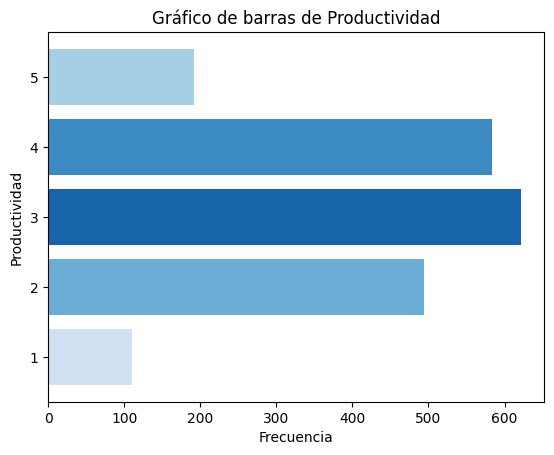

In [60]:
# Obtenemos los datos de productividad y frecuencia
productividad = df['productividad_hoy'].value_counts().sort_index().index
frecuencia = df['productividad_hoy'].value_counts().sort_index().values

# Ordenamos los valores de productividad y frecuencia de forma descendente por frecuencia
indices_ordenados = np.argsort(frecuencia)
productividad_ordenada = productividad[indices_ordenados]
frecuencia_ordenada = frecuencia[indices_ordenados]

# Generamos los colores oscureciendo a medida que aumenta la frecuencia
colores = plt.cm.Blues(np.linspace(0.2, 0.8, len(productividad_ordenada)))

# Generamos el gráfico de barras con el eje de productividad en el eje y y los colores personalizados
plt.barh(productividad_ordenada, frecuencia_ordenada, color=colores)
plt.xlabel('Frecuencia')
plt.ylabel('Productividad')
plt.title('Gráfico de barras de Productividad')
plt.show()

## Modelo de machine learning

En esta sección, entrenamos un modelo de regresión lineal para predecir la productividad de los usuarios. El modelo se entrena utilizando un conjunto de datos que contiene información sobre las actividades diarias de los usuarios, como si tenían una agenda planeada, si tenían reuniones planeadas, como fueron sus descansos, entre otros factores.

Primero, preparamos los datos para el entrenamiento. Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de evaluación, utilizando el 70% de los datos para el entrenamiento y el 30% para la evaluación. Luego, separamos la variable objetivo, 'productividad_hoy', de los conjuntos de entrenamiento y evaluación.

A continuación, definimos las columnas de características que se utilizarán para el entrenamiento. Estas columnas de características incluyen todas las columnas categóricas en nuestros datos. No tenemos columnas numéricas en este conjunto de datos.

Después de preparar los datos y definir las columnas de características, creamos una función de entrada para el entrenamiento y la evaluación. Esta función de entrada convierte nuestros datos en un objeto `tf.data.Dataset` que puede ser utilizado por el modelo para el entrenamiento.

Finalmente, creamos una instancia del modelo `LinearRegressor` y lo entrenamos utilizando la función de entrada de entrenamiento.

Además de entrenar el modelo, también definimos una función para obtener predicciones del modelo. Esta función toma un registro de usuario, lo utiliza para hacer una predicción con el modelo, y luego devuelve la predicción y un mensaje basado en la predicción.

El propósito de entrenar este modelo es poder predecir la productividad de los usuarios en función de sus actividades diarias. Esto nos permitirá proporcionar retroalimentación a los usuarios sobre su productividad y darles consejos para mejorarla.


In [61]:
import tensorflow as tf
import pandas as pd

df = df.drop(columns=['id_de_slack'])

total_registros = len(df)
porcentaje = 0.7
filtro1 = int(total_registros * porcentaje)

# Cargamos los conjuntos de datos a utilizar
dftrain = df.head(filtro1)  # Conjunto de entrenamiento
dfeval = df.tail(total_registros - filtro1)  # Conjunto de evaluación

y_train = dftrain.pop('productividad_hoy')
y_eval = dfeval.pop('productividad_hoy')

CATEGORICAL_COLUMNS = [
    'tienes_agenda_planeada', 'tienes_reuniones_planeadas',
    'ayunaste_hoy', 'tienes_deadline_hoy',
    'alguna_tarea_te_llevo_mas_tiempo',
    'hay_tareas_que_se_pueden_automatizar',
    'tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas',
    'usaste_alguna_metodologia_para_optimizar_el_tiempo',
    'fueron_satisfactorias_las_reuniones',
    'pudiste_resolver_tus_dudas_sobre_el_trabajo',
    'tuviste_reuniones_planificadas',
    'calificacion_descansos'
]
NUMERIC_COLUMNS = []  # No tenemos columnas numéricas

# Verificamos si los nombres de las columnas coinciden exactamente
columnas_df = set(df.columns)
columnas_categoricas = set(CATEGORICAL_COLUMNS)
columnas_faltantes = columnas_categoricas - columnas_df

if columnas_faltantes:
    raise ValueError(f"Las siguientes columnas categóricas no se encontraron en el dataframe: {columnas_faltantes}")

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds

    return input_function


train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False, batch_size=1)

linear_reg = tf.estimator.LinearRegressor(feature_columns=feature_columns)

linear_reg.train(train_input_fn)  # Entrenamiento

# Función para obtener la predicción y el mensaje
def obtener_prediccion(registro):
    nuevo_registro = pd.DataFrame([registro], columns=df.columns)  # Incluimos todas las columnas

    # Verifica si las columnas del registro coinciden con las del dataframe
    columnas_registro = set(nuevo_registro.columns)
    columnas_df = set(df.columns)
    columnas_faltantes = columnas_registro - columnas_df

    if columnas_faltantes:
        raise ValueError(f"Las siguientes columnas del registro no se encontraron en el dataframe: {columnas_faltantes}")

    predict_input_fn = make_input_fn(nuevo_registro, label_df=None, num_epochs=1, shuffle=False, batch_size=1)
    predictions = linear_reg.predict(predict_input_fn)
    prediction_values = [prediction['predictions'][0] for prediction in predictions]
    prediccion_productividad = prediction_values[0]

    if round(prediccion_productividad) == registro['productividad_hoy']:
        mensaje = "¡Muy bien! Estás acorde a tus predicciones de productividad."
    elif round(prediccion_productividad) < registro['productividad_hoy']:
        mensaje = "¡Wow, tu productividad es mayor a la predicha por el modelo!"
    else:
        mensaje = "¡Sigue trabajando duro para mejorar tu productividad!"


    return prediccion_productividad, mensaje


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\agusv\\AppData\\Local\\Temp\\tmptceby_di', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\agusv\AppData\Local\Temp\tmptceby_di\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 10.8125, step = 0
INFO:tensorflow:global_step/sec: 102.192
INFO:tensorflow:loss = 0.8712897, step = 100 (0.980 sec)
INFO:tensorflow:global_step/sec: 421.005
INFO:tensorflow:loss = 1.2450325, step = 200 (0.240 sec)
INFO:tensorflow:global_step/sec: 421.953
INFO:tensorflow:loss = 1.343757, step = 300 (0.233 sec)
INFO:tensorflow:global_step/sec: 425.02
INFO:tensorflow:loss = 1.227114, step = 400 (0.237 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 440...
INFO:tensorflow:Saving checkpoints fo

### Guardamos el modelo
Después de entrenar el modelo, es importante guardar el modelo para su uso futuro. Guardar el modelo nos permite reutilizar el modelo sin tener que volver a entrenarlo, lo que puede ahorrar mucho tiempo, especialmente si el entrenamiento del modelo es costoso en términos de tiempo y recursos computacionales.

Para guardar el modelo, utilizamos la función `export_saved_model` de TensorFlow. Esta función guarda el modelo en un formato que puede ser cargado y utilizado para hacer predicciones en un momento posterior. Específicamente, guardamos el modelo en un directorio llamado 'modelo_guardado'.

In [62]:
import tensorflow as tf
import numpy as np

# Exportar el modelo
feature_spec = tf.feature_column.make_parse_example_spec(feature_columns)
serving_input_receiver_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)
export_path = linear_reg.export_saved_model('modelo_guardado', serving_input_receiver_fn=serving_input_receiver_fn)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: ['serving_default', 'regression']
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Restoring parameters from C:\Users\agusv\AppData\Local\Temp\tmptceby_di\model.ckpt-440
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: modelo_guardado\temp-1687797430\saved_model.pb


### Cargamos el modelo en una variable
Una vez que el modelo está guardado, podemos cargar el modelo en cualquier momento para hacer predicciones. Para cargar el modelo, utilizamos la función `tf.saved_model.load` de TensorFlow. Esta función carga el modelo desde el directorio en el que fue guardado.

Cargar el modelo en una variable nos permite utilizar el modelo para hacer predicciones en cualquier momento. Esto es especialmente útil si estamos utilizando el modelo en una aplicación en tiempo real, donde necesitamos hacer predicciones sobre la marcha.

In [63]:
# Cargar el modelo exportado
loaded_model = tf.saved_model.load(export_path)

### Función para Predecir Nuevos Registros: `predict_new_instance`

La función `predict_new_instance` es una función que hemos creado para hacer predicciones en nuevas instancias de datos utilizando el modelo que hemos entrenado y guardado.

La función toma dos argumentos: `instance` y `model`. `instance` es un nuevo registro de datos para el cual queremos hacer una predicción, y `model` es el modelo que hemos entrenado y cargado.

La función sigue estos pasos:

1. **Conversión de la instancia a un diccionario**: Convertimos la instancia de datos en un diccionario para que pueda ser procesada por TensorFlow.

2. **Creación de un Dataset a partir del diccionario**: Creamos un Dataset de TensorFlow a partir del diccionario. Un Dataset de TensorFlow es una estructura de datos que es eficiente para el entrenamiento de modelos en TensorFlow.

3. **Agrupación del Dataset**: Agrupamos el Dataset en lotes de tamaño 1, ya que estamos haciendo una predicción para una sola instancia.

4. **Serialización de la instancia**: Serializamos la instancia para que pueda ser procesada por el modelo.

5. **Realización de predicciones con el modelo cargado**: Utilizamos el modelo para hacer una predicción en la instancia serializada.

6. **Obtención de los resultados de predicción**: Obtenemos los resultados de la predicción del modelo.

7. **Redondeo de la predicción a un número entero**: Redondeamos la predicción a un número entero, ya que estamos prediciendo la productividad, que es un número entero.

8. **Creación de un mensaje basado en la predicción**: Creamos un mensaje personalizado basado en la predicción. El mensaje varía dependiendo de si la productividad predicha es igual, menor o mayor que la productividad real.

La función `predict_new_instance` nos permite hacer predicciones en nuevas instancias de datos de una manera eficiente y personalizada.


In [64]:
def predict_new_instance(instance, model):
    # Convertir la instancia a un diccionario
    instance_dict = {col: [instance[col]] for col in instance.keys()}
    
    # Crear un Dataset a partir del diccionario
    dataset = tf.data.Dataset.from_tensor_slices(instance_dict)
    
    # Agrupar el Dataset
    dataset = dataset.batch(1)
    
    # Serializar la instancia
    serialized_instance = tf.train.Example(features=tf.train.Features(feature={
        col: tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.compat.as_bytes(str(instance[col]))])) for col in instance.keys()
    })).SerializeToString()
    
    # Realizar predicciones con el modelo cargado
    predictions = model.signatures['serving_default'](tf.constant([serialized_instance]))
    
    # Obtener los resultados de predicción
    predicted_values = predictions['outputs'].numpy()
    
    # Redondear la predicción a un número entero
    predicted_productivity = round(predicted_values[0][0])
    
    # Crear un mensaje basado en la predicción
    if predicted_productivity == instance['productividad_hoy']:
        if instance['productividad_hoy'] == 1:
            message = f"Hoy fue un día difícil, pero mañana será mejor! Tu respuesta coincidió con la productividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif instance['productividad_hoy'] == 2:
            message = f"No fue tu mejor día, pero sé que puedes mejorar! Tu respuesta coincidió con la porductividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif instance['productividad_hoy'] == 3:
            message = f"Hiciste un buen trabajo hoy, pero sé que puedes hacerlo aún mejor! Tu respuesta coincidió con la productividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif instance['productividad_hoy'] == 4:
            message = f"¡Excelente trabajo hoy! ¡Sigue así! Tu respuesta coincidió con la productividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif instance['productividad_hoy'] == 5:
            message = f"¡Hiciste un trabajo increíble hoy! ¡Sigue superándote! Tu respuesta coincidió con la productividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
    
    elif predicted_productivity < instance['productividad_hoy']:
        if instance['productividad_hoy'] == 5:
            message = f"¡Hiciste un trabajo increíble hoy! ¡Sigue superándote! Tu respuesta superó la productividad del modelo. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity == 4:
            message = f"Parece que tu productividad fue menor a lo esperado, pero sigue estando muy bien! ¡Sigue así! Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity <= 3:
            message = f"Tu productividad fue un poco menor a lo esperado. ¡Mañana es otro día para mejorar! Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity <= 2:
            message = f"Tu productividad fue un poco menor a lo esperado, pero mañana será mejor! Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
    
    elif predicted_productivity > instance['productividad_hoy']:
        if predicted_productivity == 5:
            message = f"¡Superaste las expectativas hoy! ¡Excelente trabajo! La productividad del modelo superó tu respuesta. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity == 4:
            message = f"¡Hiciste un buen trabajo hoy! ¡Sigue así! La productividad del modelo superó tu respuesta. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity == 3:
            message = f"Hiciste un buen trabajo hoy, pero sé que puedes hacerlo aún mejor! La productividad del modelo superó tu respuesta. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity == 2:
            message = f"No fue tu mejor día, pero sé que puedes mejorar! La productividad del modelo superó tu respuesta. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        elif predicted_productivity == 1:
            message = f"Hoy fue un día difícil, pero mañana será mejor! La productividad del modelo superó tu respuesta. Productividad predicha: {predicted_productivity}, Productividad real: {instance['productividad_hoy']}"
        
    return message


### Probamos la funcion con nuevos registros

In [65]:
new_instance  = {
    'id_de_slack': 'slack_user0',
    'tienes_agenda_planeada': 'Si',
    'tienes_reuniones_planeadas': 'No',
    'con_que_areas_te_vas_a_reunir': 'Otro',
    'ayunaste_hoy': 'No',
    'tienes_deadline_hoy': 'Si',
    'alguna_tarea_te_llevo_mas_tiempo': 'Si',
    'hay_tareas_que_se_pueden_automatizar': 'Si',
    'tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas': 'Si',
    'usaste_alguna_metodologia_para_optimizar_el_tiempo': 'Si',
    'fueron_satisfactorias_las_reuniones': 'Si',
    'pudiste_resolver_tus_dudas_sobre_el_trabajo': 'Si',
    'tuviste_reuniones_planificadas': 'Si',
    'productividad_hoy': 3,
    'calificacion_descansos': 'Suficientes pero mal distribuidos' }

# Llamar a la función de predicción
message = predict_new_instance(new_instance, loaded_model)

print(message)

Hiciste un buen trabajo hoy, pero sé que puedes hacerlo aún mejor! Tu respuesta coincidió con la productividad del modelo. Productividad predicha: 3, Productividad real: 3


In [66]:
new_instance = {
    'id_de_slack': 'slack_user0',
    'tienes_agenda_planeada': 'Si',
    'tienes_reuniones_planeadas': 'No',
    'con_que_areas_te_vas_a_reunir': 'Otro, Data',
    'ayunaste_hoy': 'No',
    'tienes_deadline_hoy': 'Si',
    'alguna_tarea_te_llevo_mas_tiempo': 'Si',
    'hay_tareas_que_se_pueden_automatizar': 'Si',
    'tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas': 'Si',
    'usaste_alguna_metodologia_para_optimizar_el_tiempo': 'Si',
    'fueron_satisfactorias_las_reuniones': 'Si',
    'pudiste_resolver_tus_dudas_sobre_el_trabajo': 'Si',
    'tuviste_reuniones_planificadas': 'No',
    'productividad_hoy': 4,
    'calificacion_descansos': 'Suficientes pero mal distribuidos' }
# Llamar a la función de predicción
message = predict_new_instance(new_instance, loaded_model)
print(message)

Tu productividad fue un poco menor a lo esperado. ¡Mañana es otro día para mejorar! Productividad predicha: 3, Productividad real: 4


In [67]:
new_instance = {
    'id_de_slack': 'slack_user0',
    'tienes_agenda_planeada': 'Si',
    'tienes_reuniones_planeadas': 'No',
    'con_que_areas_te_vas_a_reunir': 'Data',
    'ayunaste_hoy': 'No',
    'tienes_deadline_hoy': 'No',
    'alguna_tarea_te_llevo_mas_tiempo': 'Si',
    'hay_tareas_que_se_pueden_automatizar': 'Si',
    'tuviste_que_ir_a_algun_lugar_para_hacer_tus_tareas': 'Si',
    'usaste_alguna_metodologia_para_optimizar_el_tiempo': 'NO',
    'fueron_satisfactorias_las_reuniones': 'No',
    'pudiste_resolver_tus_dudas_sobre_el_trabajo': 'No',
    'tuviste_reuniones_planificadas': 'SI',
    'productividad_hoy': 1,
    'calificacion_descansos': 'Suficientes pero mal distribuidos' }
# Llamar a la función de predicción
message = predict_new_instance(new_instance, loaded_model)
print(message)

No fue tu mejor día, pero sé que puedes mejorar! La productividad del modelo superó tu respuesta. Productividad predicha: 2, Productividad real: 1


### Evaluación del Modelo

Una vez que hemos entrenado nuestro modelo, es importante evaluar su rendimiento. Para ello, utilizamos un conjunto de datos de evaluación que el modelo no ha visto durante el entrenamiento. Esto nos permite tener una idea de cómo se comportará el modelo con nuevos datos.

En nuestro caso, utilizamos las métricas de error cuadrático medio (MSE), error absoluto medio (MAE) y el coeficiente de determinación (R^2) para evaluar el rendimiento del modelo. Estas métricas nos proporcionan diferentes perspectivas sobre el rendimiento del modelo:

- **MSE**: Esta métrica nos da una idea de cuánto se desvían nuestras predicciones del valor real. Cuanto más pequeño sea el MSE, mejor será el modelo.

- **MAE**: Esta métrica es similar al MSE, pero es menos sensible a los valores atípicos ya que no eleva al cuadrado las diferencias.

- **R^2**: Esta métrica nos indica cuánta variación en los datos puede explicar nuestro modelo. Un valor de R^2 de 1 indica que nuestro modelo puede explicar toda la variación en los datos, mientras que un valor de 0 indica que nuestro modelo no puede explicar ninguna variación.

Es importante tener en cuenta que nuestro modelo fue entrenado con datos sintéticos. Esto significa que los resultados de la evaluación pueden no ser óptimos. Sin embargo, a medida que el modelo se reentrena con nuevos datos reales, esperamos que su rendimiento mejore. La reentrenamiento del modelo con nuevos datos reales permite al modelo aprender de los patrones en los datos reales y ajustar sus predicciones en consecuencia.

Por lo tanto, aunque los resultados iniciales de la evaluación del modelo pueden no ser los mejores, esperamos que mejoren con el tiempo a medida que el modelo se reentrena con más datos reales.

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Obtener las predicciones para el conjunto de evaluación
eval_predictions = linear_reg.predict(eval_input_fn)
eval_prediction_values = [prediction['predictions'][0] for prediction in eval_predictions]

# Calcular las métricas
mse = mean_squared_error(y_eval, eval_prediction_values)
mae = mean_absolute_error(y_eval, eval_prediction_values)
r2 = r2_score(y_eval, eval_prediction_values)

# Imprimir las métricas
print("Métricas de evaluación:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\agusv\AppData\Local\Temp\tmptceby_di\model.ckpt-440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Métricas de evaluación:
MSE: 1.1495714562480281
MAE: 0.8784679901599884
R^2: 0.007276153873689739
